Dataset Shape: (200, 4)
Missing Values:
 Customer ID       0
Age               0
Annual Income     0
Spending Score    0
dtype: int64
Duplicate Rows: 0
Data Types:
 Customer ID       int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object
Summary Statistics:
        Customer ID        Age  Annual Income  Spending Score
count   200.000000  200.00000     200.000000      200.000000
mean    100.500000   43.42500   55589.495000       50.320000
std      57.879185   14.94191   24393.930013       29.538113
min       1.000000   18.00000   15301.000000        1.000000
25%      50.750000   31.00000   34070.250000       23.000000
50%     100.500000   43.50000   58250.000000       52.000000
75%     150.250000   56.00000   75806.500000       75.250000
max     200.000000   69.00000   99896.000000       99.000000


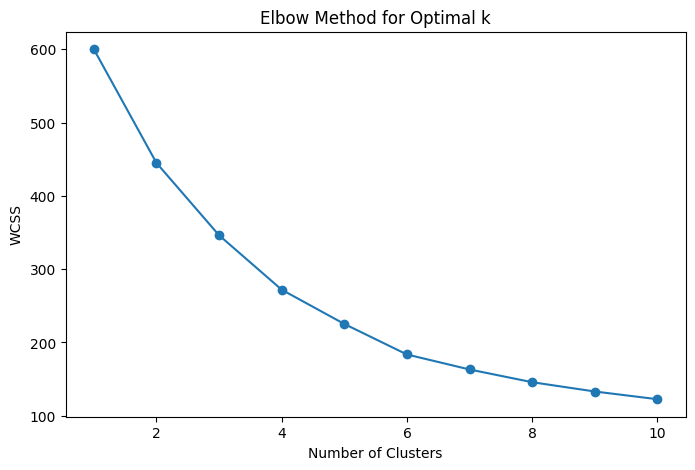

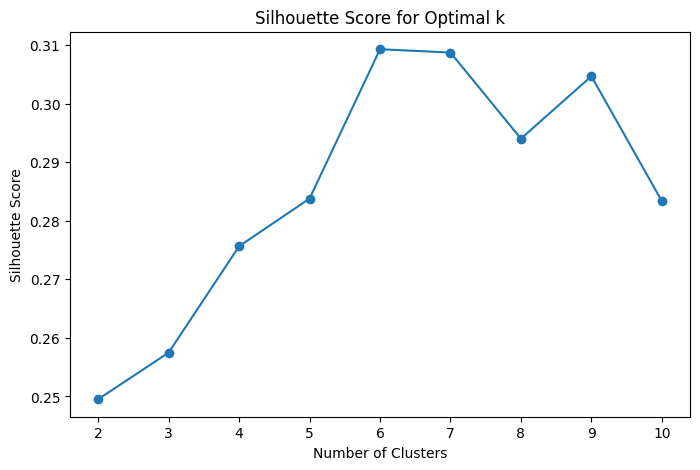

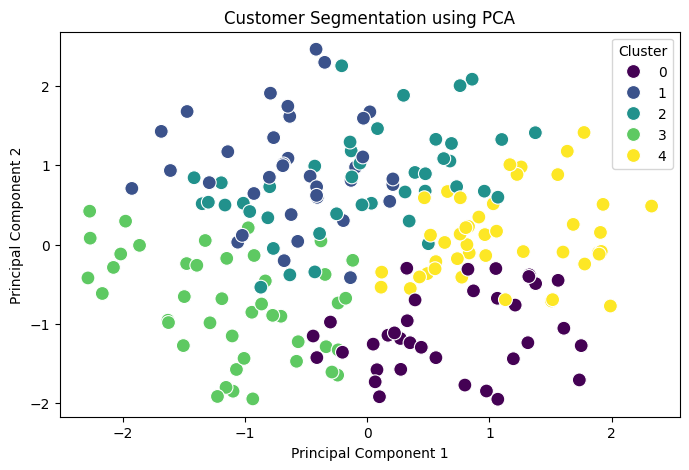

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = "C:\\datascience\\customer_data.csv"  # Ensure the correct file path
df = pd.read_csv(file_path)

# Inspect the dataset
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())
print("Data Types:\n", df.dtypes)
print("Summary Statistics:\n", df.describe())

# Drop Customer ID as it's not useful for clustering
df = df.drop(columns=["Customer ID"], errors='ignore')

# Handle missing values (if any)
df = df.dropna()  # You can also use df.fillna(df.mean()) instead

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Determine optimal number of clusters using Elbow Method
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Compute silhouette scores for different cluster sizes
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    sil_scores.append(silhouette_score(df_scaled, labels))

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

# Choose optimal clusters dynamically from the Elbow method (e.g., k=5 if optimal)
k_optimal = 5  # Modify based on the elbow method
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualize Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df, s=100)
plt.title('Customer Segmentation using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()